## IMPORTING LIBRARIES ##

In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("darkgrid")

import sklearn
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')


## DATA IMPORTING   ##

In [2]:
pm = pd.read_csv('/content/predictive_maintenance.csv')
pm


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
pm.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
pm.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [5]:
pm.shape

(10000, 10)

In [6]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
pm.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# DATA PRE-PROCESSING #

In [8]:
pm= pm.drop(["UDI",'Product ID'],axis=1)
pm.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
5,M,298.1,308.6,1425,41.9,11,0,No Failure
6,L,298.1,308.6,1558,42.4,14,0,No Failure
7,L,298.1,308.6,1527,40.2,16,0,No Failure
8,M,298.3,308.7,1667,28.6,18,0,No Failure
9,M,298.5,309.0,1741,28.0,21,0,No Failure


In [9]:
pm.shape

(10000, 8)

## DATA CLEANING ##

In [10]:
pm.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [11]:
pm.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

In [12]:
# Calculate median for numeric columns only
pm.select_dtypes(include='number').groupby(['Target']).median()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Target,,,,,
0,300.0,310.0,1507.0,39.9,107.0
1,301.6,310.4,1365.0,53.7,165.0


In [13]:
#df.groupby(['Type','Target']).median()
pmcat = pm.groupby('Type')['Failure Type'].value_counts().unstack().fillna(0)
pmcat


Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Type,,,,,,
H,8,979,1,5,4,6
L,74,5757,73,59,12,25
M,30,2916,4,31,2,14


## OUTLERS DETECTION ##

<Axes: xlabel='Air temperature [K]'>

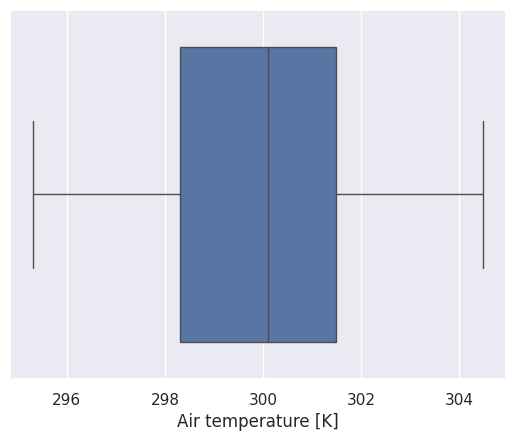

In [14]:
sns.boxplot(x=pm['Air temperature [K]'])

<Axes: xlabel='Process temperature [K]'>

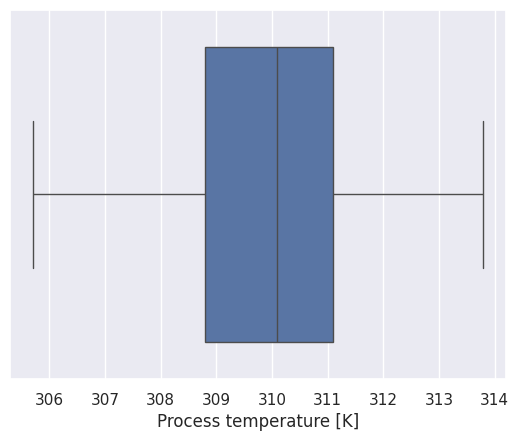

In [15]:
sns.boxplot(x=pm['Process temperature [K]'])

<Axes: xlabel='Rotational speed [rpm]'>

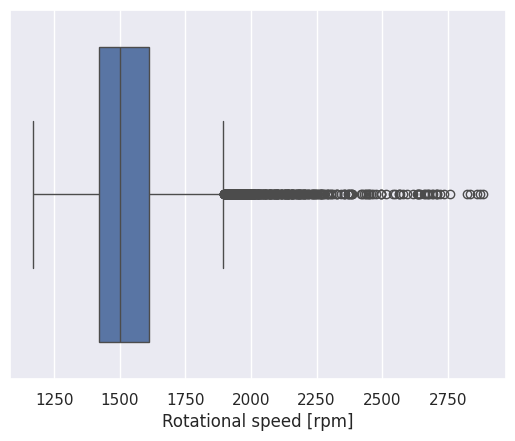

In [16]:
sns.boxplot(x=pm['Rotational speed [rpm]'])

<Axes: xlabel='Torque [Nm]'>

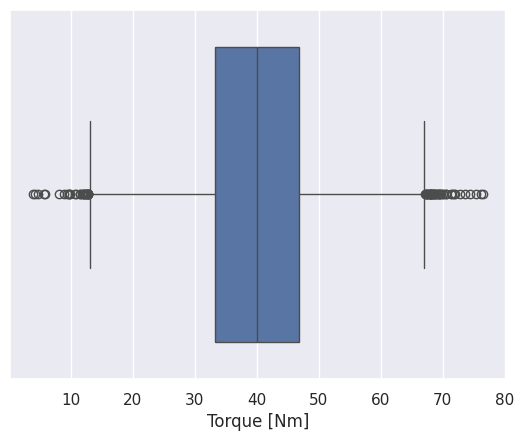

In [17]:
sns.boxplot(x=pm['Torque [Nm]'])

<Axes: xlabel='Tool wear [min]'>

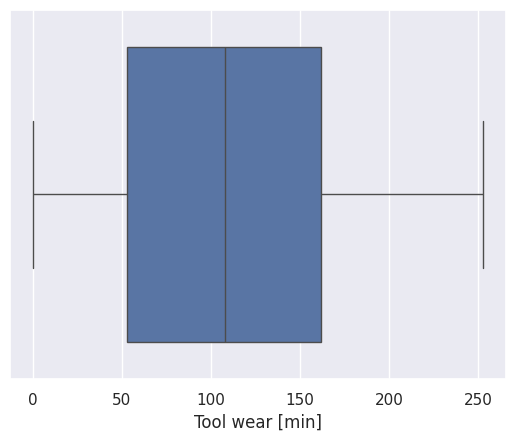

In [18]:
sns.boxplot(x=pm['Tool wear [min]'])

<Axes: xlabel='Target'>

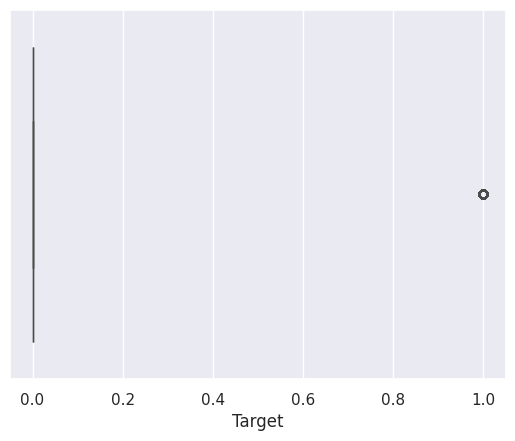

In [19]:
sns.boxplot(x=pm['Target'])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Air temperature [K]'),
  Text(1, 0, 'Process temperature [K]'),
  Text(2, 0, 'Rotational speed [rpm]'),
  Text(3, 0, 'Torque [Nm]'),
  Text(4, 0, 'Tool wear [min]'),
  Text(5, 0, 'Target')])

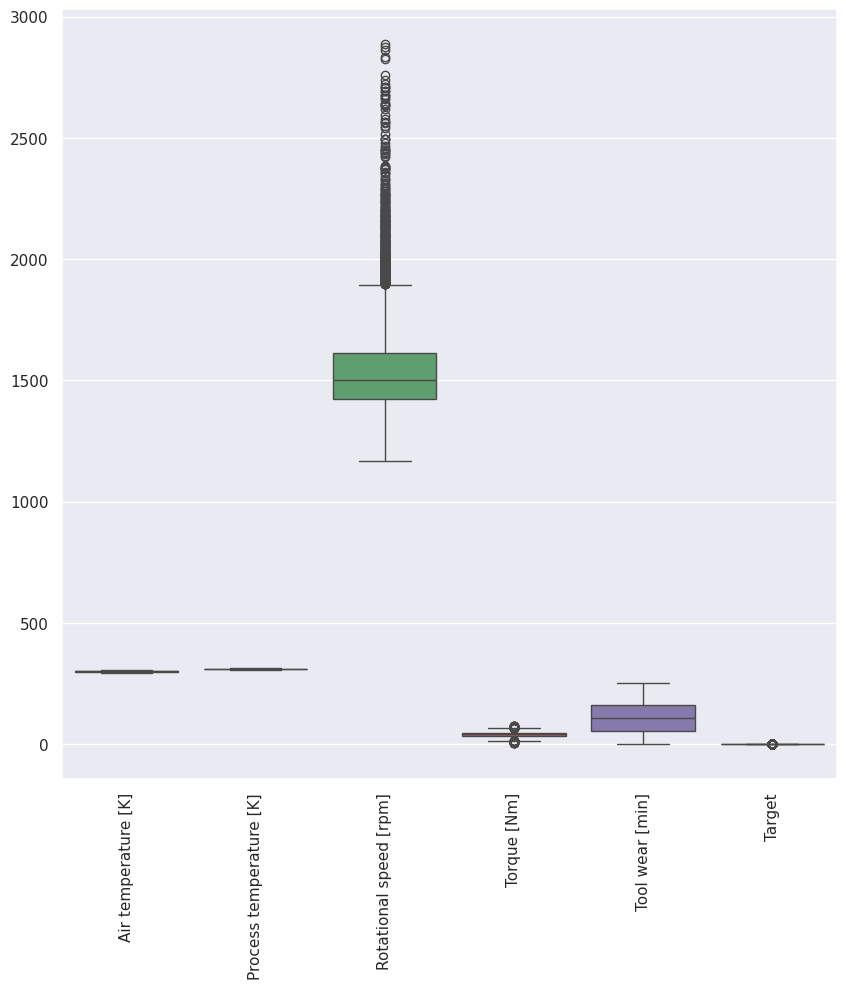

In [20]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = pm,orient = 'v',width=0.8)
plt.xticks(rotation=90)

## REMOVAL OF OUTLERS USING INTER QUARTILE METHOD ##

In [21]:
import pandas as pd

# Assuming df is your DataFrame and 'column' is the column from which you want to remove outliers
Q1 = pm['Rotational speed [rpm]'].quantile(0.25)
Q3 = pm['Torque [Nm]'].quantile(0.75)
IQR = Q3 - Q1

# Only keep rows in the dataframe that do not have outliers
pm_no_outliers = pm[~((pm['Rotational speed [rpm]'] < (Q1 - 1.5 * IQR)) | (pm['Torque [Nm]'] > (Q3 + 1.5 * IQR)))]

print(pm_no_outliers)

Empty DataFrame
Columns: [Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Target, Failure Type]
Index: []


DataFrame without outliers using IQR:
     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4  

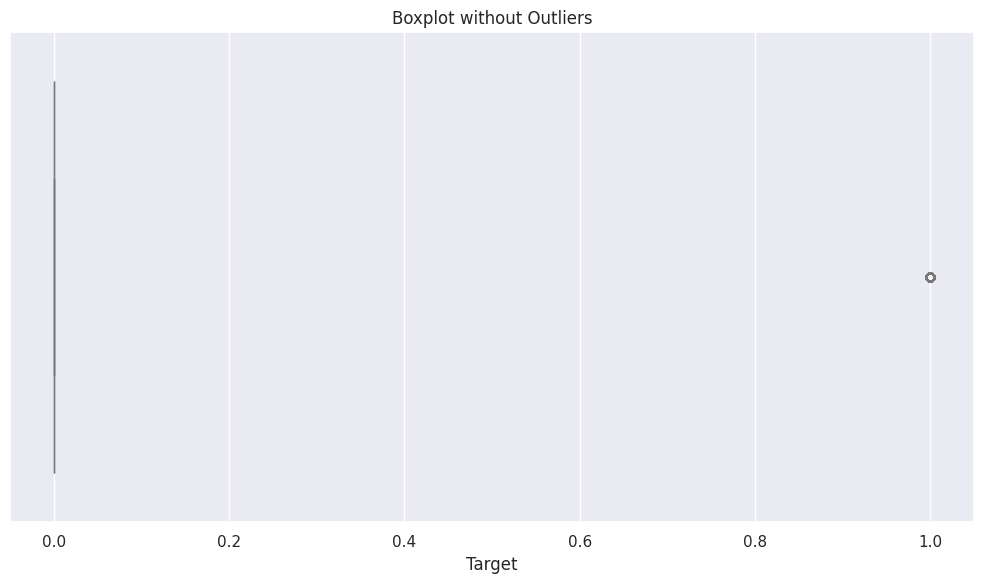

In [22]:
def remove_outliers_iqr(df, column):
    Q1 = pm[column].quantile(0.25)
    Q3 = pm[column].quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ~((pm[column] < (Q1 - 1.5 * IQR)) | (pm[column] > (Q3 + 1.5 * IQR)))
    pm_no_outliers = pm[filtered_entries]
    return pm_no_outliers


pm_no_outliers_iqr = remove_outliers_iqr(pm.copy(), 'Rotational speed [rpm]') # Create a copy to avoid modifying the original DataFrame
print("DataFrame without outliers using IQR:")
print(pm_no_outliers_iqr)

# For plotting, ensure 'Target' is a numerical or categorical column
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.boxplot(x=pm_no_outliers_iqr['Target'],color='lightblue' ) # Use the filtered DataFrame
plt.title('Boxplot without Outliers')

plt.tight_layout()
plt.show()

## EXPLORATORY DATA ANALYSIS (EDA)

Text(0.5, 0, 'Target')

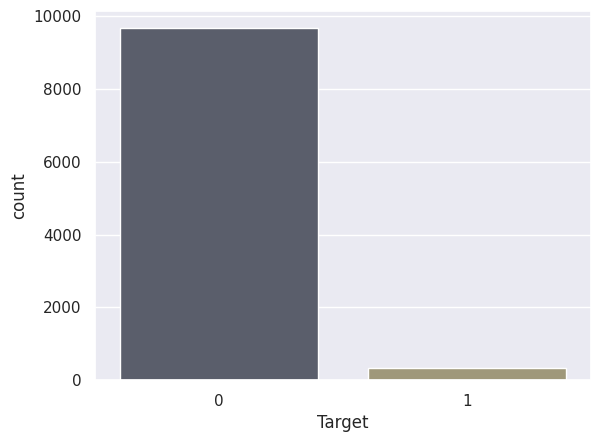

In [23]:
sns.countplot(x = pm['Target'], palette= 'cividis')
plt.xlabel('Target')

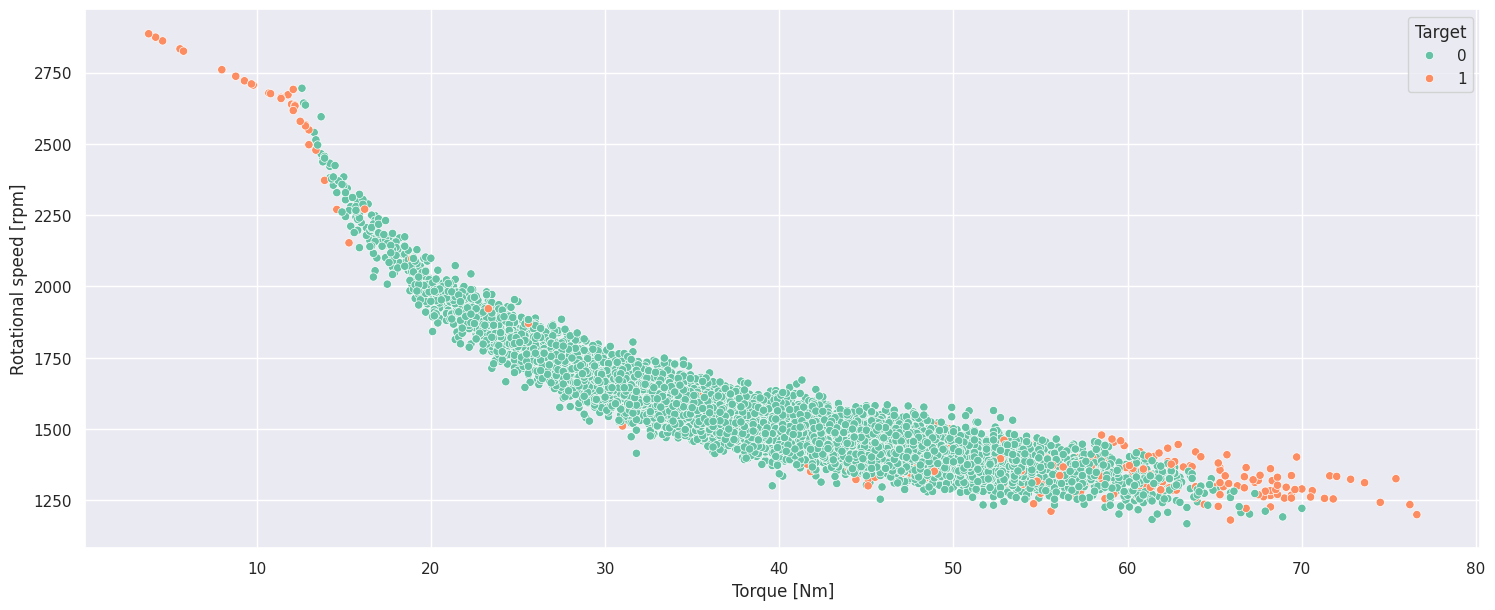

In [24]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=pm, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="Set2");

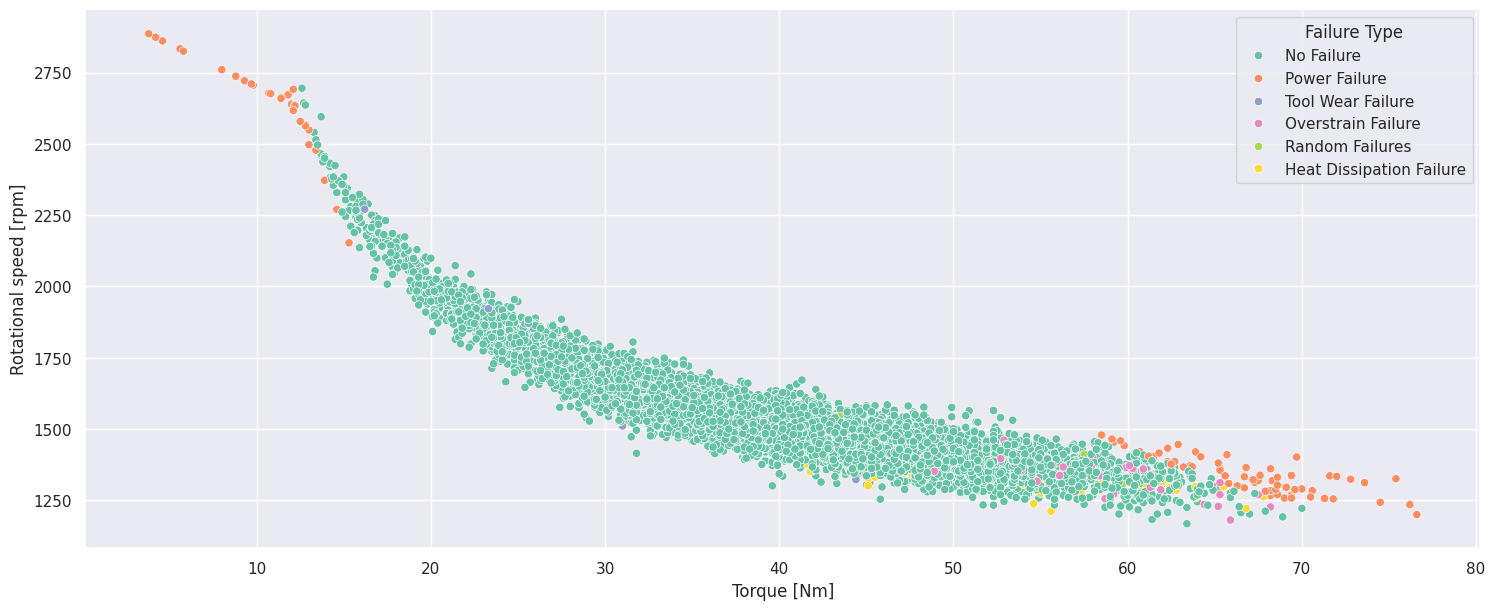

In [25]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=pm, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="Set2");

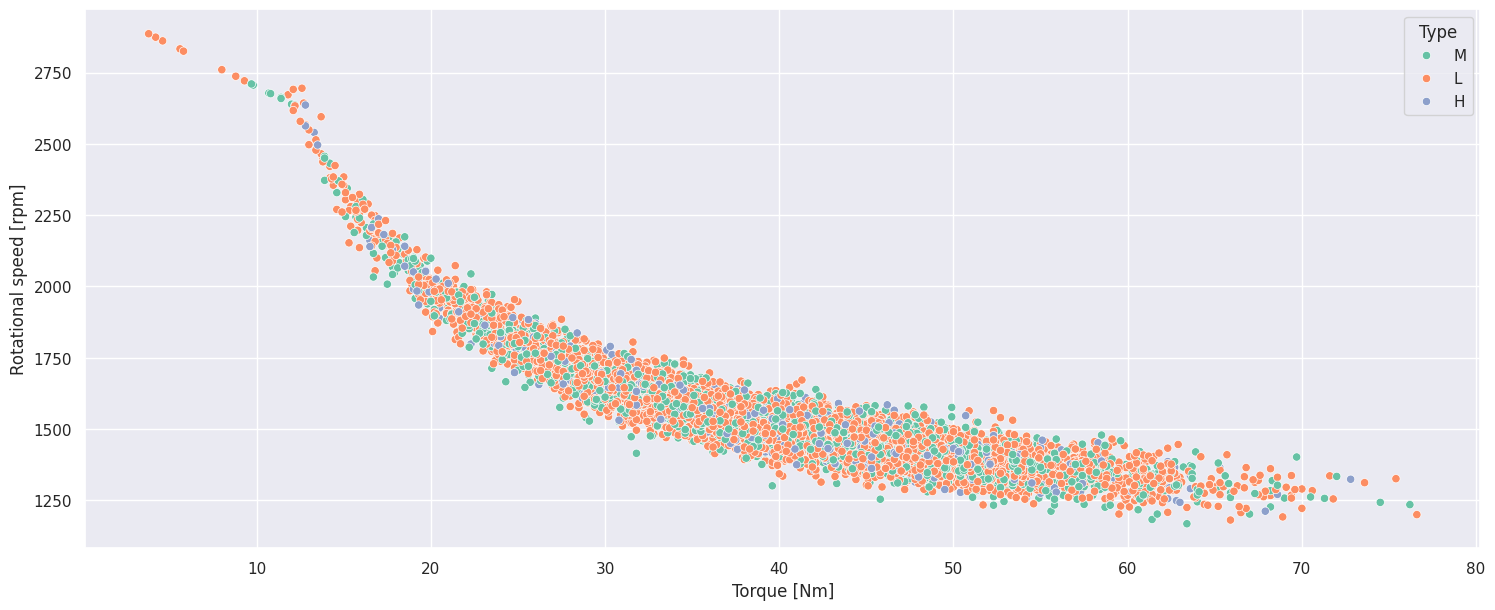

In [26]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=pm, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="Set2");

In [27]:
!pip install plotly
import plotly.express as px
machines = pm['Failure Type'].value_counts()

names = machines.index.tolist()

fig = px.pie(
    machines,
    values=machines.values,
    names=names,
    title='Proportion of Faulty Machines',
)

fig.update_layout(legend_title_text='Failure Type', title_x=0.3, title_y=0.95,)
fig.show()

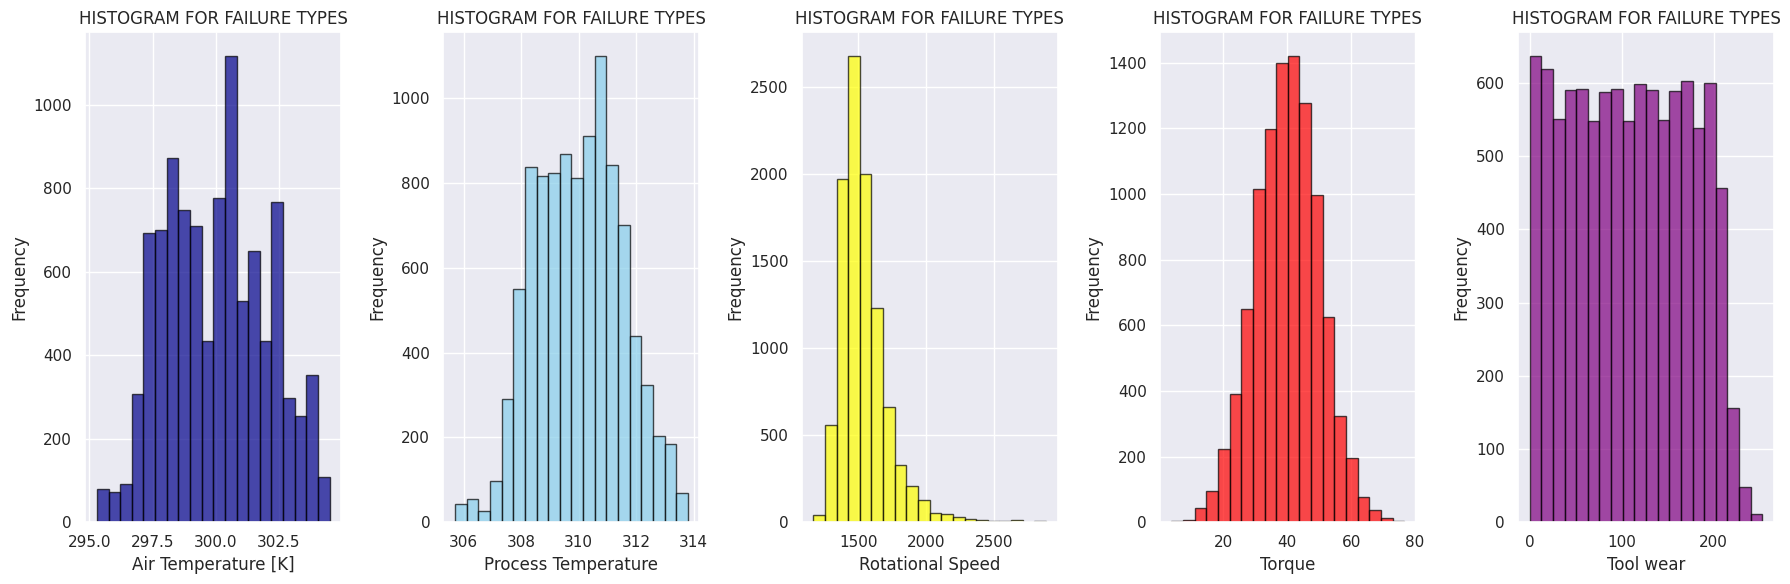

In [28]:
#Histogram for Air Temp
plt.figure(figsize=(18,6))

plt.subplot(1, 5, 1)
plt.hist(pm['Air temperature [K]'], color='darkblue',bins=20, edgecolor='black', alpha=0.7)
plt.title('HISTOGRAM FOR FAILURE TYPES')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Process Temp
plt.subplot(1, 5, 2)
plt.hist(pm['Process temperature [K]'],bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('HISTOGRAM FOR FAILURE TYPES')
plt.xlabel('Process Temperature')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Rotational Speed
plt.subplot(1, 5, 3)
plt.hist(pm['Rotational speed [rpm]'], bins=20, color='yellow', edgecolor='black', alpha=0.7)
plt.title('HISTOGRAM FOR FAILURE TYPES')
plt.xlabel('Rotational Speed')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Torque
plt.subplot(1, 5, 4)
plt.hist(pm['Torque [Nm]'], bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title('HISTOGRAM FOR FAILURE TYPES')
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Torque
plt.subplot(1, 5, 5)
plt.hist(pm['Tool wear [min]'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('HISTOGRAM FOR FAILURE TYPES')
plt.xlabel('Tool wear')
plt.ylabel('Frequency')
plt.grid(True)


plt.tight_layout()
plt.show()

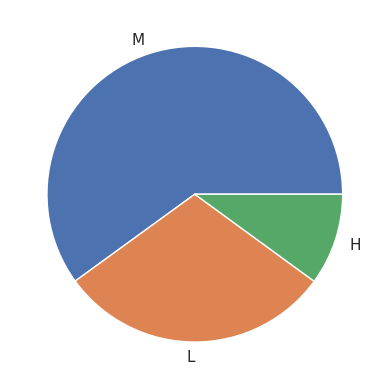

In [29]:
plt.pie(pm.Type.value_counts(), labels = pm.Type.unique())
plt.show()

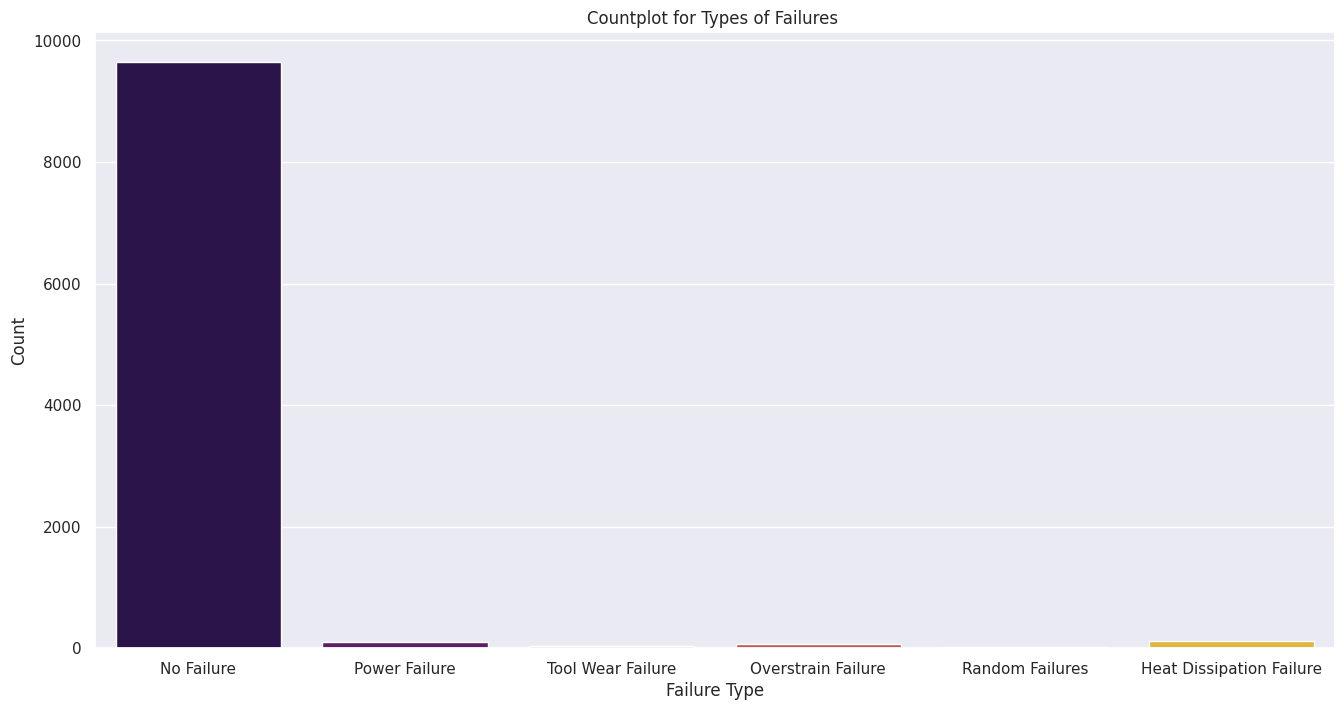

In [30]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Failure Type', data=pm, palette='inferno')

plt.title('Countplot for Types of Failures ')
plt.xlabel('Failure Type')
plt.ylabel('Count')

plt.show()

<Figure size 600x400 with 0 Axes>

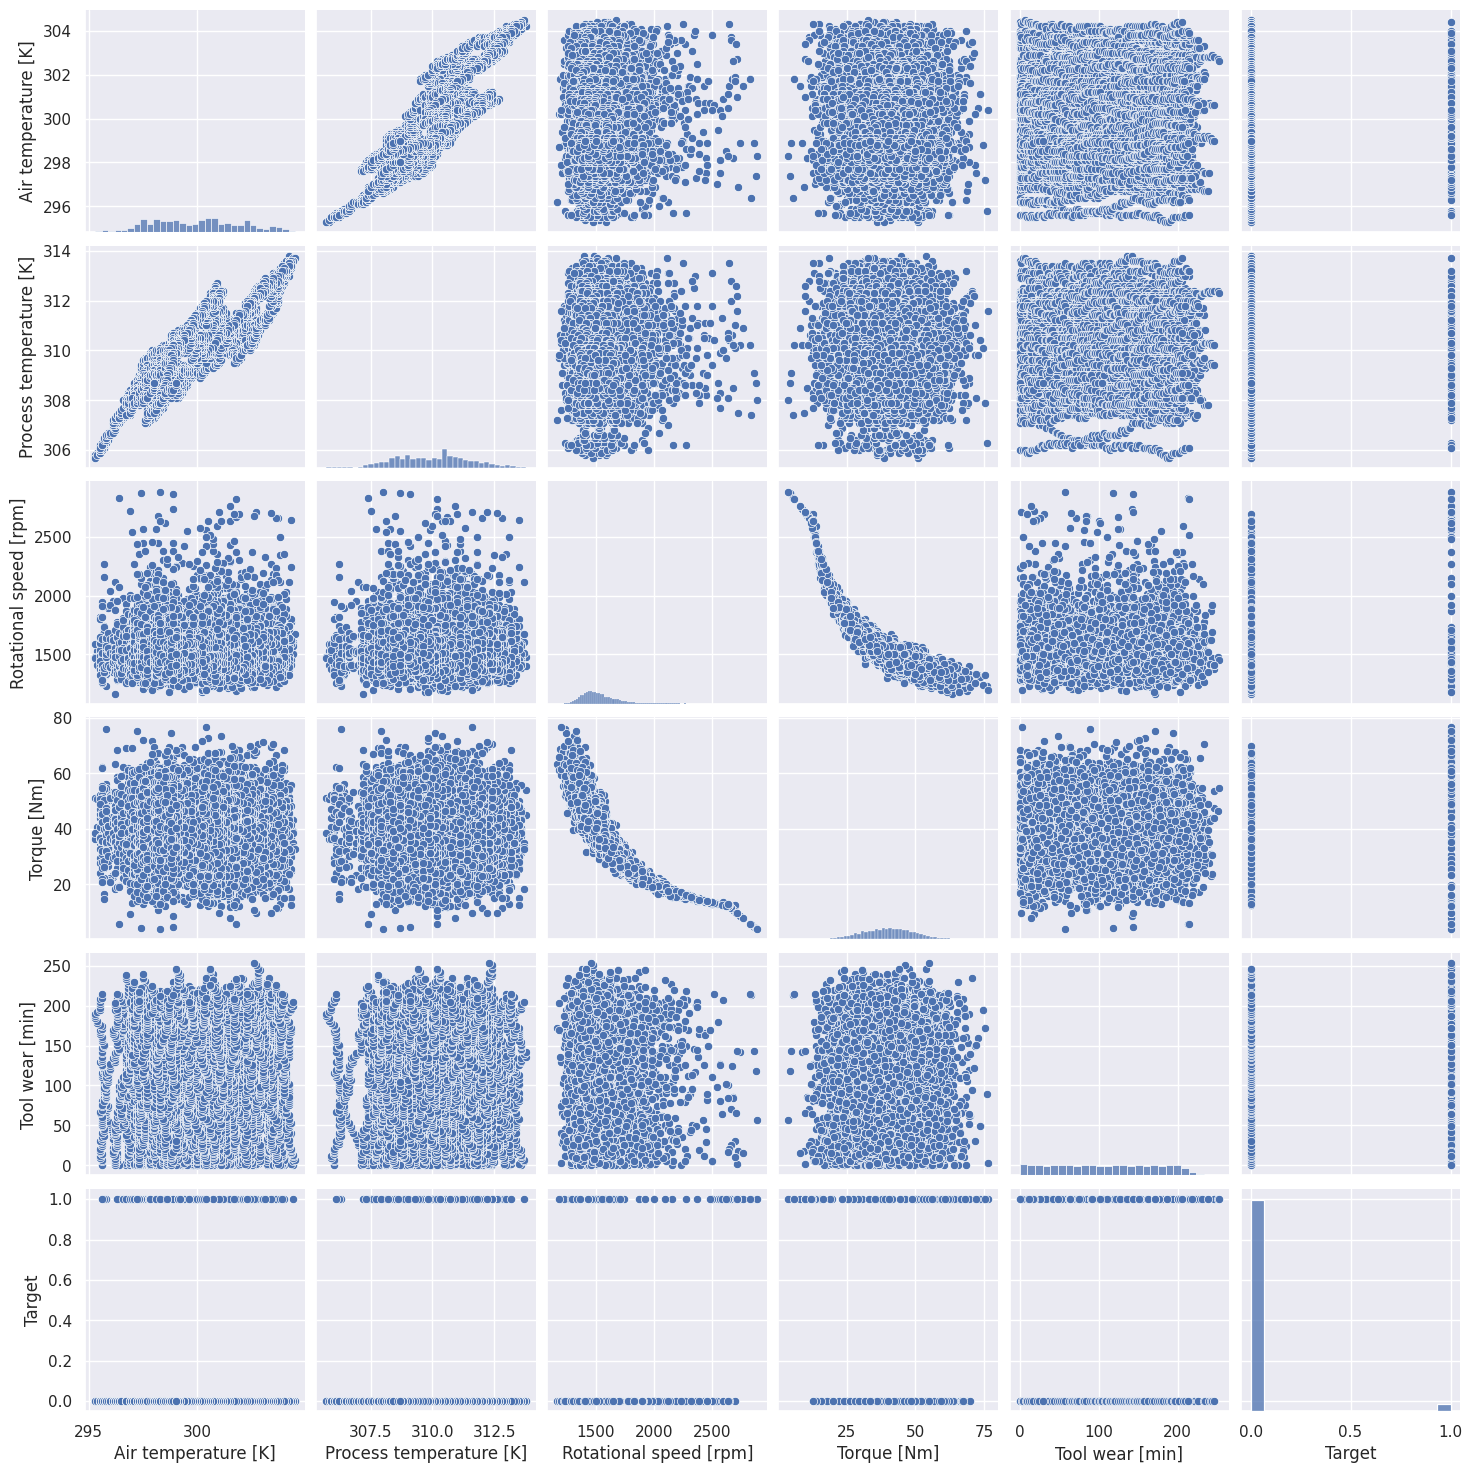

In [31]:
plt.figure(figsize=(6,4))
sns.pairplot(data=pm)

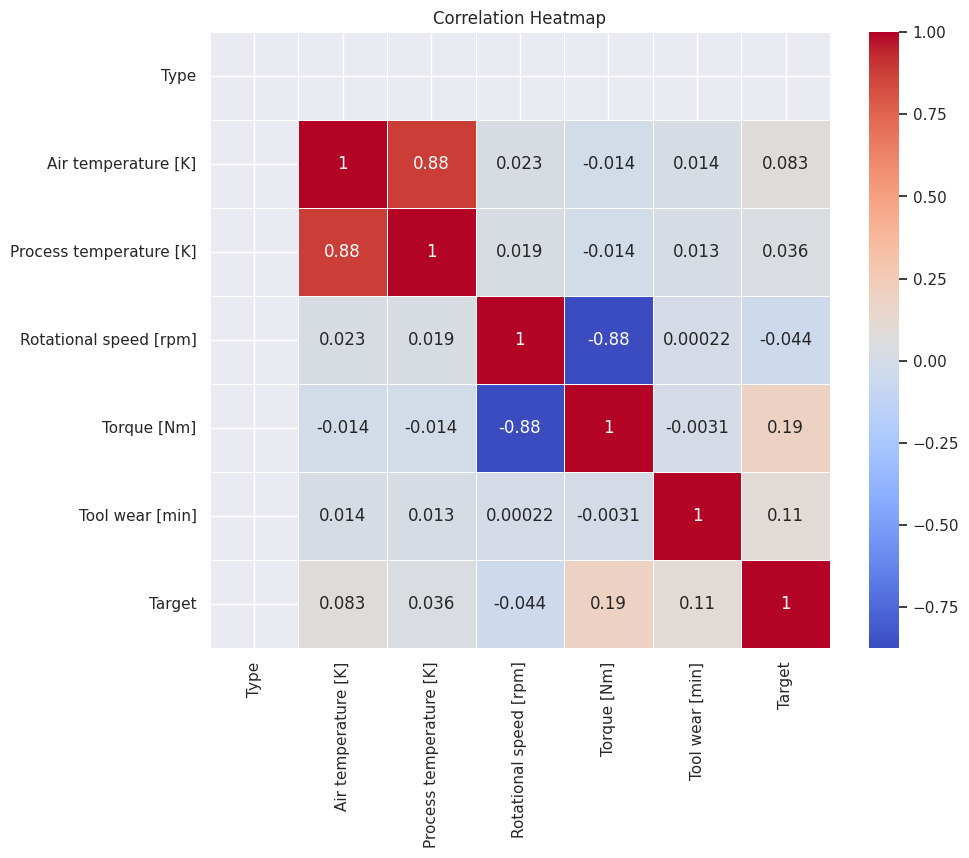

In [32]:
# Replace non-numeric values with NaN
pm = pm.replace('M', np.nan)
pm = pm.replace('L', np.nan)
pm = pm.replace('H', np.nan)

# Convert relevant columns to numeric type
for col in ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']:
    pm[col] = pd.to_numeric(pm[col], errors='coerce')  # 'coerce' handles errors by setting invalid values to NaN

# Drop the 'Failure Type' column before calculating correlation
pm_numeric = pm.drop('Failure Type', axis=1)

# Calculate the correlation matrix on the numeric data only
corr_matrix = pm_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with the given correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [33]:
pm.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,NaN,298.1,308.6,1551,42.8,0,0,No Failure
1,NaN,298.2,308.7,1408,46.3,3,0,No Failure
2,NaN,298.1,308.5,1498,49.4,5,0,No Failure
3,NaN,298.2,308.6,1433,39.5,7,0,No Failure
4,NaN,298.2,308.7,1408,40.0,9,0,No Failure


In [34]:
import sklearn.preprocessing
# Initialize the LabelEncoder
label_encoder = sklearn.preprocessing.LabelEncoder()
# Perform label encoding
pm['FT_encoder'] = label_encoder.fit_transform(pm['Failure Type'])

pm['FT_encoder'].value_counts()

FT_encoder
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64

In [35]:
# Perform one-hot encoding with drop_first=True
pm_encoder = pd.get_dummies(pm, columns=['Type'], prefix='Type', drop_first=True)
pm_encoder.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,FT_encoder
0,298.1,308.6,1551,42.8,0,0,No Failure,1
1,298.2,308.7,1408,46.3,3,0,No Failure,1
2,298.1,308.5,1498,49.4,5,0,No Failure,1
3,298.2,308.6,1433,39.5,7,0,No Failure,1
4,298.2,308.7,1408,40.0,9,0,No Failure,1


In [36]:
pm=pm_encoder
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Target                   10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
 7   FT_encoder               10000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 625.1+ KB


## BALANCING THE IMBALANCED-CLASSES ##

 IMBALANCED CLASS:
FT_encoder
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64

 BALANCED CLASS :
FT_encoder
2    7716
5    7711
3    7710
4    7709
0    7708
1    7688
Name: count, dtype: int64


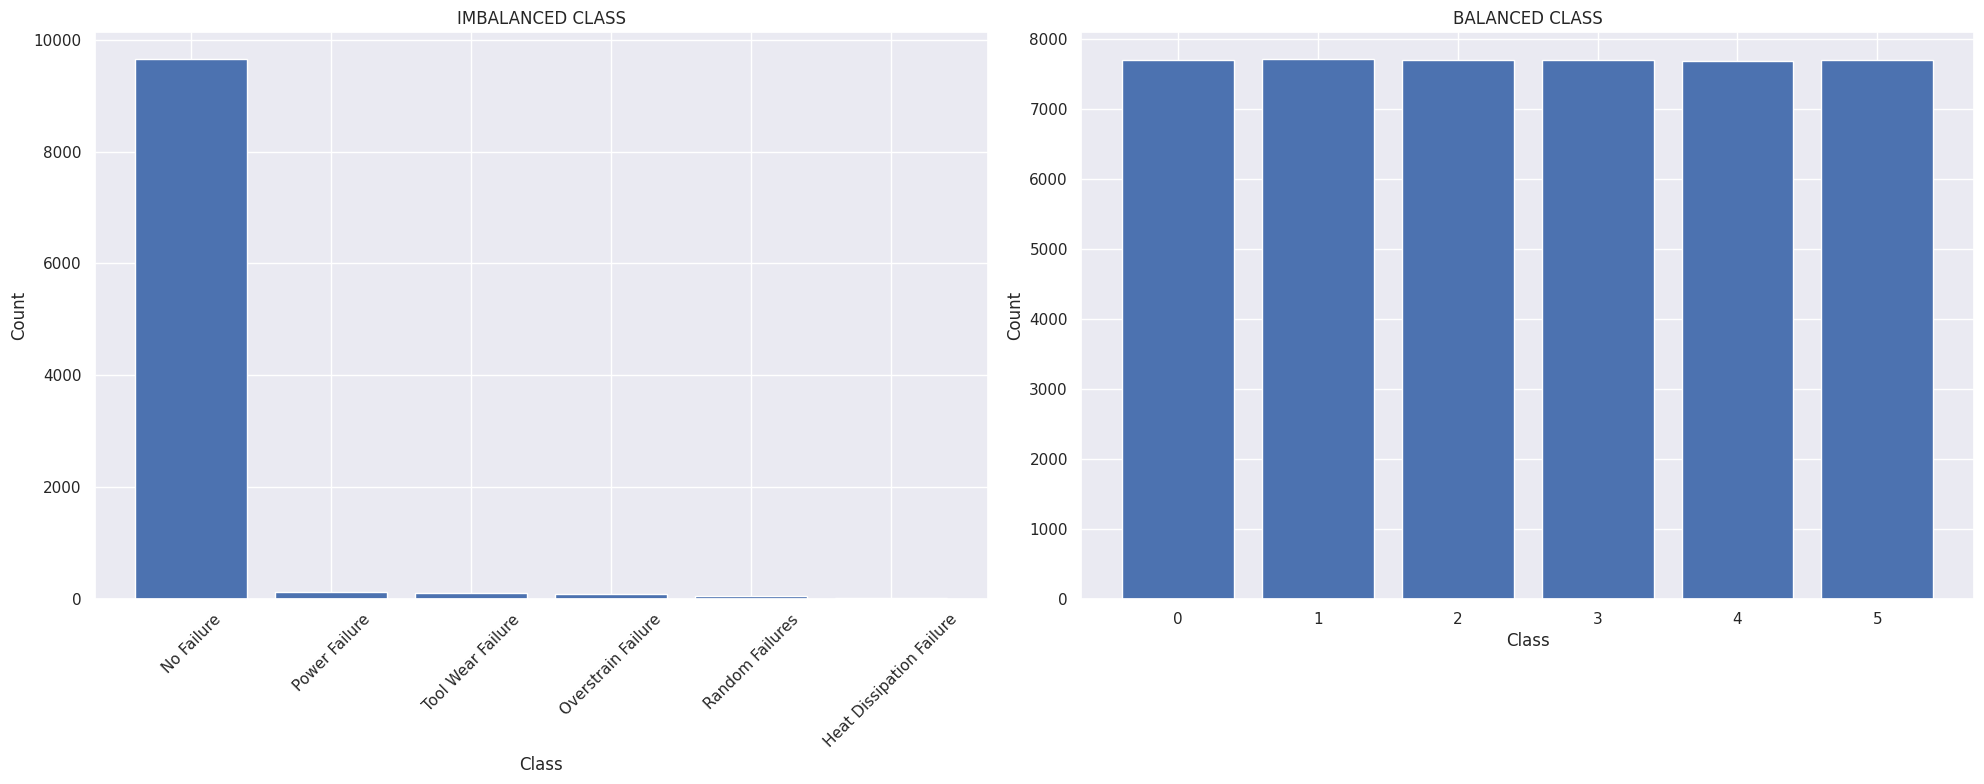

In [37]:
from imblearn.combine import SMOTETomek

# Define features and target
X = pm.drop(['Failure Type','Target','FT_encoder'], axis=1).values
y = pm['FT_encoder'].values

# Split data into train, validation, and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Count the original class distribution
print(" IMBALANCED CLASS:")
print(pm['FT_encoder'].value_counts())

smt=SMOTETomek(sampling_strategy='auto',random_state=42)

X_trainresampled, y_trainresampled = smt.fit_resample(X_train, y_train)

# Convert the resampled dataset to a DataFrame
pm_resampled = pd.DataFrame(X_trainresampled, columns=[f'feature_{i}' for i in range(X_trainresampled.shape[1])])
pm_resampled['FT_encoder'] = y_trainresampled

# Count the class distribution after balancing
print("\n BALANCED CLASS :")
print(pm_resampled['FT_encoder'].value_counts())

#Visualize the class distribution before and after balancing
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.bar(pm['Failure Type'].unique(), pm['Failure Type'].value_counts())
plt.title("IMBALANCED CLASS")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(pm_resampled['FT_encoder'].unique(), pm_resampled['FT_encoder'].value_counts())
plt.title("BALANCED CLASS")
plt.xlabel("Class")
plt.ylabel("Count")


plt.tight_layout()
plt.show()

In [38]:
print(X_train.shape, y_train.shape , X_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


In [39]:
from sklearn.preprocessing import StandardScaler

# Scale the data after SMOTETomek
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_trainresampled)
X_test_scaled = scaler.transform(X_test)

In [40]:
print(X_train.shape, y_train.shape , X_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


## ML ALGORITHMS ##

# LOGISTIC REGRESSION #

In [41]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 ,random_state= 42)

model=LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision:{precision:.4f}")

recall = recall_score(y_test, y_pred,average='weighted' )
print(f"Recall:{recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score:{f1:.4f}")

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.6075
Precision:0.9700
Recall:0.6075
F1 Score:0.7348
              precision    recall  f1-score   support

           0       0.06      0.80      0.11        15
           1       1.00      0.60      0.75      1935
           2       0.21      0.69      0.33        13
           3       0.36      0.95      0.52        20
           4       0.00      0.17      0.00         6
           5       0.07      0.91      0.13        11

    accuracy                           0.61      2000
   macro avg       0.28      0.69      0.31      2000
weighted avg       0.97      0.61      0.73      2000



# RANDOM FOREST #

In [42]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40 ,random_state= 42)

model=RandomForestClassifier(max_depth=5,random_state=42)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred,average='weighted')
print(f"Precision:{precision:.4f}")

recall = recall_score(y_test, y_pred,average='weighted')
print(f"Recall:{recall:.4f}")

f1 = f1_score(y_test, y_pred,average='weighted')
print(f"F1 Score:{f1:.4f}")

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.97375
Precision:0.9569
Recall:0.9738
F1 Score:0.9642
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.98      1.00      0.99      3864
           2       0.78      0.25      0.38        28
           3       0.83      0.68      0.75        44
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        17

    accuracy                           0.97      4000
   macro avg       0.43      0.32      0.35      4000
weighted avg       0.96      0.97      0.96      4000



# DECISION TREE #

In [43]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40 ,random_state= 42)

model=DecisionTreeClassifier(max_depth=8,random_state=42)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision:{precision:.4f}")

recall = recall_score(y_test, y_pred,average='weighted')
print(f"Recall:{recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score:{f1:.4f}")

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.97825
Precision:0.9733
Recall:0.9782
F1 Score:0.9757
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        37
           1       0.99      0.99      0.99      3864
           2       0.47      0.32      0.38        28
           3       0.82      0.82      0.82        44
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        17

    accuracy                           0.98      4000
   macro avg       0.53      0.50      0.51      4000
weighted avg       0.97      0.98      0.98      4000



# BAGGING #

In [44]:
from sklearn.ensemble import BaggingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 ,random_state= 42)

model=BaggingClassifier(n_estimators= 50, max_samples=0.8,random_state=42)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision:{precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall:{recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score:{f1:.4f}")

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.9825
Precision:0.9742
Recall:0.9825
F1 Score:0.9782
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.99      1.00      0.99      1935
           2       0.78      0.54      0.64        13
           3       0.80      0.80      0.80        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.58      0.54      0.56      2000
weighted avg       0.97      0.98      0.98      2000



## BOOSTING ##

# ADA BOOST #

In [45]:
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 ,random_state= 42)

model=AdaBoostClassifier(n_estimators= 100, learning_rate=0.1,random_state=42)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision:{precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall:{recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score:{f1:.4f}")

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.966
Precision:0.9492
Recall:0.9660
F1 Score:0.9549
              precision    recall  f1-score   support

           0       0.28      0.33      0.30        15
           1       0.97      1.00      0.98      1935
           2       1.00      0.08      0.14        13
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2000
   macro avg       0.38      0.23      0.24      2000
weighted avg       0.95      0.97      0.95      2000



# GRADIENT BOOSTING #

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 ,random_state= 42)

model=GradientBoostingClassifier(n_estimators= 100, learning_rate=0.1,max_depth=5 ,random_state=42)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision:{precision:.4f}")

recall = recall_score(y_test, y_pred,average='weighted')
print(f"Recall:{recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score:{f1:.4f}")

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.98
Precision:0.9727
Recall:0.9800
F1 Score:0.9763
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.99      0.99      0.99      1935
           2       0.64      0.54      0.58        13
           3       0.80      0.80      0.80        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.55      0.53      0.54      2000
weighted avg       0.97      0.98      0.98      2000



# XG BOOST #

In [47]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 ,random_state= 42)

model=XGBClassifier(n_estimators= 100, learning_rate=0.1,max_depth=5 ,random_state=42)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision:{precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall:{recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score:{f1:.4f}")

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.982
Precision:0.9737
Recall:0.9820
F1 Score:0.9777
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.99      1.00      0.99      1935
           2       0.67      0.62      0.64        13
           3       0.81      0.65      0.72        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.56      0.53      0.54      2000
weighted avg       0.97      0.98      0.98      2000



# KNN #

In [48]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 ,random_state= 42)

model=KNeighborsClassifier(n_neighbors=8)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred,average='weighted')
print(f"Precision:{precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall:{recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score:{f1:.4f}")

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.969
Precision:0.9485
Recall:0.9690
F1 Score:0.9560
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.97      1.00      0.98      1935
           2       0.33      0.08      0.12        13
           3       0.75      0.15      0.25        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2000
   macro avg       0.34      0.20      0.23      2000
weighted avg       0.95      0.97      0.96      2000



# SVM #

In [49]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30 ,random_state= 42)

model=SVC(kernel='linear', random_state=42)
model.fit(X_train,y_train)

y_pred= model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision:{precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall:{recall:.4f}")

f1 = f1_score(y_test, y_pred , average='weighted')
print(f"F1 Score:{f1:.4f}")

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.9816666666666667
Precision:0.9738
Recall:0.9817
F1 Score:0.9774
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.98      1.00      0.99      2903
           2       0.74      0.64      0.68        22
           3       0.96      0.81      0.88        31
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.98      3000
   macro avg       0.57      0.49      0.52      3000
weighted avg       0.97      0.98      0.98      3000



In [50]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Generate imbalanced synthetic data
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1708   91]
 [  69  132]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1799
           1       0.59      0.66      0.62       201

    accuracy                           0.92      2000
   macro avg       0.78      0.80      0.79      2000
weighted avg       0.92      0.92      0.92      2000



In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier  # Ensure xgboost is installed: `pip install xgboost`
import numpy as np

# Define hyperparameter distributions for each algorithm
param_distributions = {
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],  # Note: 'l1' penalty is not supported with 'liblinear' solver in LogisticRegression by default
        'solver': ['liblinear', 'lbfgs']
    },
    'RandomForestClassifier': {
        'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],  # 100 to 1000 in steps
        'max_depth': [None, 5, 10, 15, 20, 25, 30],
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 5, 10, 15, 20, 25, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'BaggingClassifier': {
        'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
        'max_samples': [0.5, 0.75, 1.0],
        'max_features': [0.5, 0.75, 1.0]
    },
    'AdaBoostClassifier': {
        'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
        'learning_rate': [0.01, 0.1, 1, 10]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
        'learning_rate': [0.01, 0.1, 0.5, 1.0],
        'max_depth': [3, 5, 7, 9],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.5, 0.75, 1.0]
    },
    'XGBoostClassifier': {
        'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
        'learning_rate': [0.01, 0.1, 0.5, 1.0],
        'max_depth': [3, 5, 7, 9],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.75, 1.0],
        'colsample_bytree': [0.5, 0.75, 1.0]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [int(x) for x in np.linspace(start=1, stop=30, num=30)],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto']
    },
    'GaussianNB': {
        'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]  # Var_smoothing parameter values
    }
}

# Define the estimator for each algorithm
estimators = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'BaggingClassifier': BaggingClassifier(base_estimator=DecisionTreeClassifier()),
    'AdaBoostClassifier': AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBoostClassifier': XGBClassifier(),  # Make sure to install xgboost
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'GaussianNB': GaussianNB()
}

# Perform random search for each algorithm
for algorithm, param_dist in param_distributions.items():
    estimator = estimators[algorithm]
    random_search = RandomizedSearchCV(estimator, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)

    # Evaluate performance metrics
    y_pred = random_search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Best parameters for {algorithm}: {random_search.best_params_}")
    print(f"Best cross-validated score: {random_search.best_score_}")
    print(f"Accuracy on test data: {accuracy:.3f}")
    print(f"Precision on test data: {precision:.3f}")
    print(f"Recall on test data: {recall:.3f}")
    print(f"F1 score on test data: {f1:.3f}")
    print()


Best parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Best cross-validated score: 0.9356249999999999
Accuracy on test data: 0.936
Precision on test data: 0.930
Recall on test data: 0.936
F1 score on test data: 0.929

Best parameters for RandomForestClassifier: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}
Best cross-validated score: 0.947625
Accuracy on test data: 0.953
Precision on test data: 0.950
Recall on test data: 0.953
F1 score on test data: 0.951

Best parameters for DecisionTreeClassifier: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}
Best cross-validated score: 0.93725
Accuracy on test data: 0.942
Precision on test data: 0.937
Recall on test data: 0.942
F1 score on test data: 0.935

Best parameters for BaggingClassifier: {'n_estimators': 600, 'max_samples': 0.5, 'max_features': 1.0}
Best cross-validated score: 0.9476249999999998
Accuracy on t

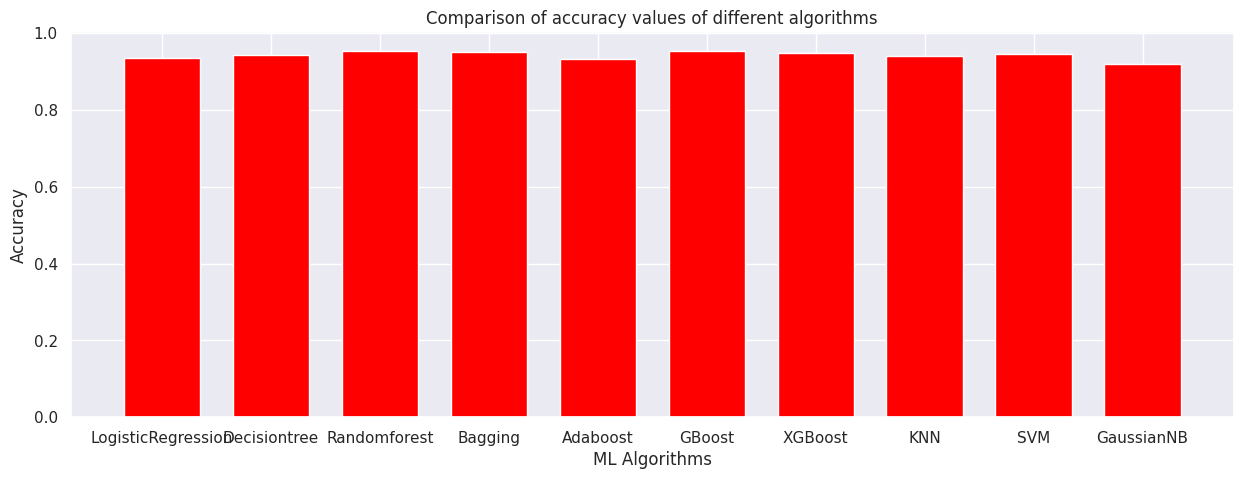

In [58]:
data = {'LogisticRegression':0.936,   'Decisiontree':0.944, 'Randomforest':0.955,'Bagging':0.952, 'Adaboost':0.932, 'GBoost':0.953, 'XGBoost':0.950,'KNN':0.942,'SVM':0.947, 'GaussianNB': 0.920}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))
plt.bar(courses, values, color = 'red',width=0.7)
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of accuracy values of different algorithms")
plt.show()

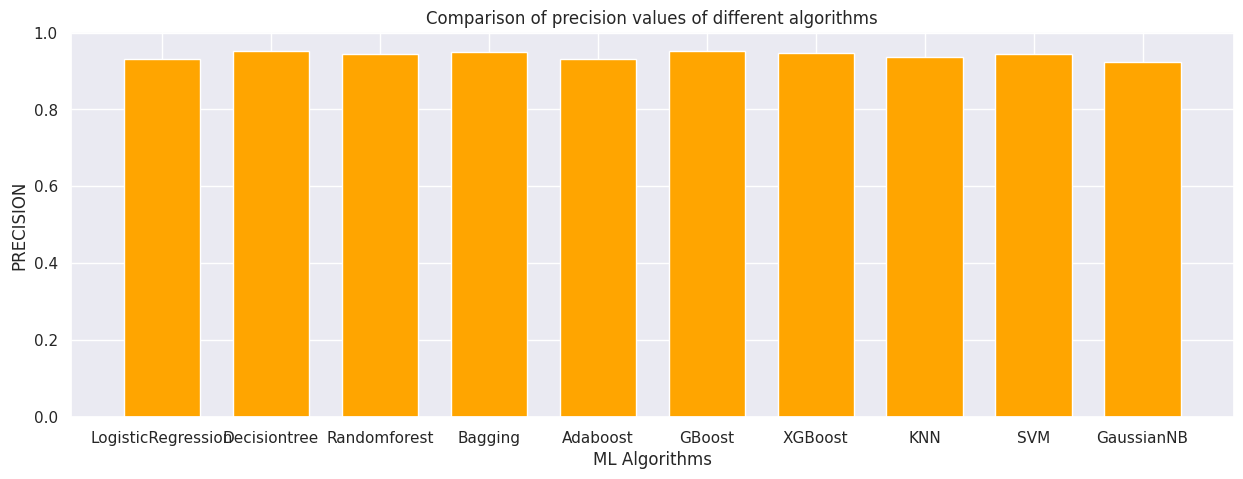

In [59]:
data = {'LogisticRegression':0.930,   'Decisiontree':0.953, 'Randomforest':0.943,'Bagging':0.950, 'Adaboost':0.932, 'GBoost':0.951, 'XGBoost':0.948,'KNN':0.937,'SVM':0.943, 'GaussianNB': 0.924}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))
plt.bar(courses, values, color = 'orange',width=0.7)
plt.xlabel("ML Algorithms")
plt.ylabel("PRECISION")
plt.title("Comparison of precision values of different algorithms")
plt.show()

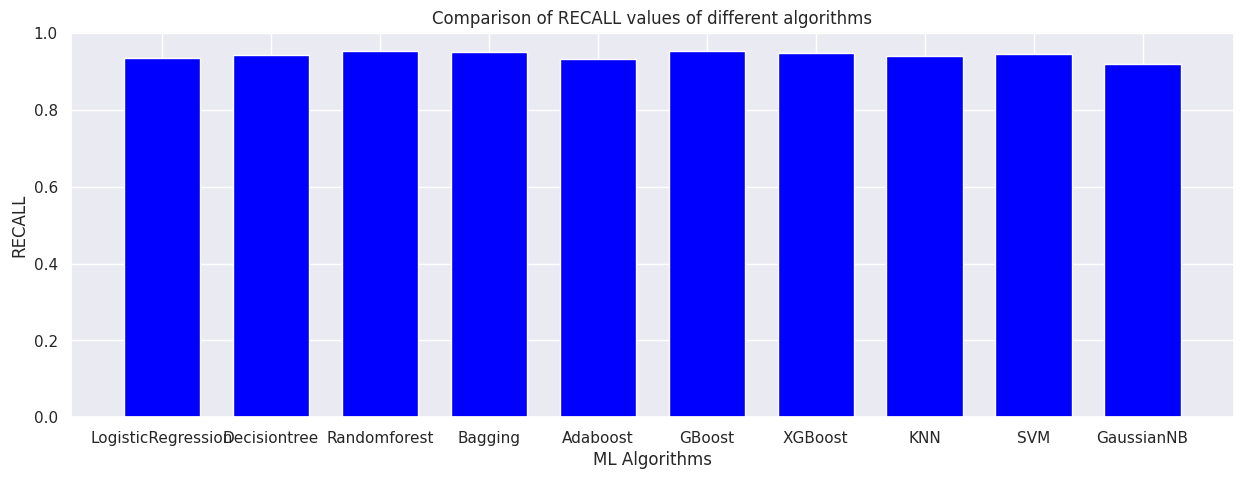

In [60]:
data = {'LogisticRegression':0.936,   'Decisiontree':0.944, 'Randomforest':0.955,'Bagging':0.952, 'Adaboost':0.932, 'GBoost':0.953, 'XGBoost':0.950,'KNN':0.942,'SVM':0.947, 'GaussianNB': 0.920}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))
plt.bar(courses, values, color = 'blue',width=0.7)
plt.xlabel("ML Algorithms")
plt.ylabel("RECALL")
plt.title("Comparison of RECALL values of different algorithms")
plt.show()

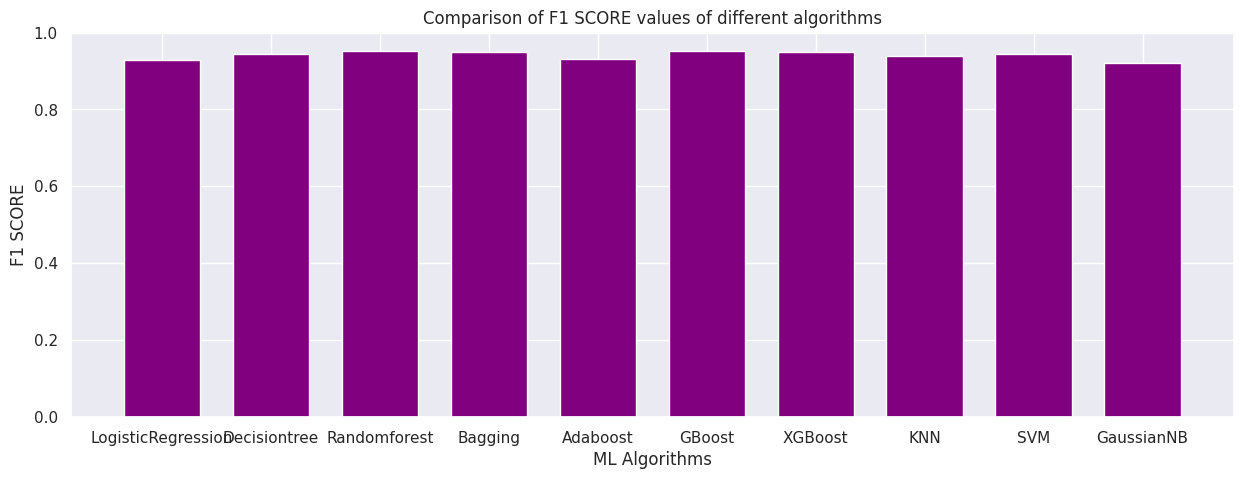

In [61]:
data = {'LogisticRegression':0.929,   'Decisiontree':0.944, 'Randomforest':0.953,'Bagging':0.950, 'Adaboost':0.932, 'GBoost':0.952, 'XGBoost':0.949,'KNN':0.938,'SVM':0.943, 'GaussianNB': 0.922}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))
plt.bar(courses, values, color = 'purple',width=0.7)
plt.xlabel("ML Algorithms")
plt.ylabel("F1 SCORE")
plt.title("Comparison of F1 SCORE values of different algorithms")
plt.show()